# sigma_v_p_p_hp
$e+H_2^{+}\rightarrow e+H^{+}+H^{+}+e$

<sigma V> for Te=100 eV: 8.37783634042274e-15 m^3/s


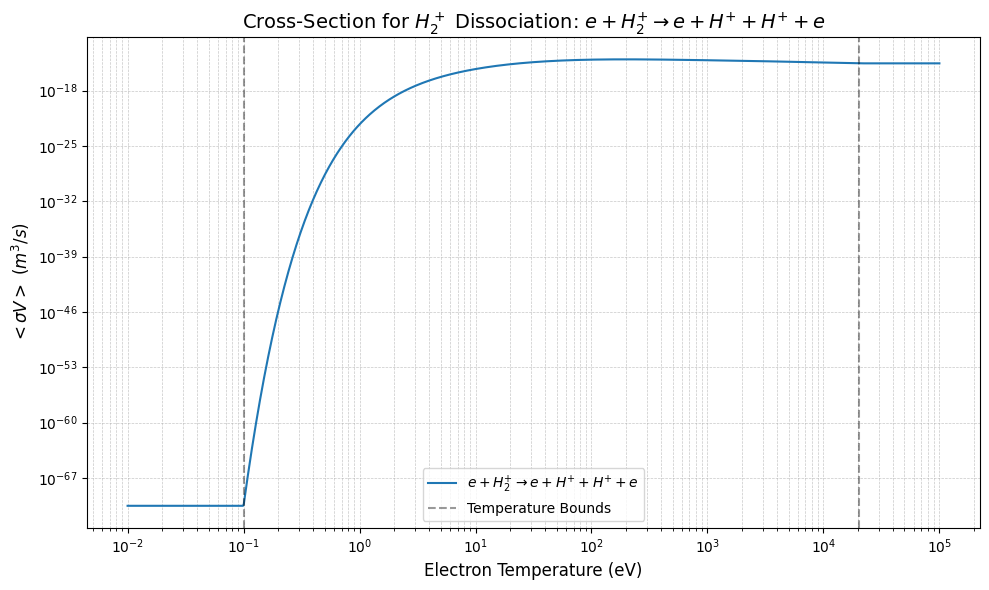

In [26]:
import numpy as np

def sigma_v_p_p_hp(Te):
    """
    Returns Maxwellian-averaged <sigma V> for electron impact dissociation of molecular hydrogen ions
    resulting in two protons. Coefficients are taken from Janev, "Elementary Processes in Hydrogen-Helium
    Plasmas", Springer-Verlag, 1987, p.260.

    Parameters:
        Te (float or array-like): Electron temperature in eV. Must be within the range [0.1, 2e4] eV.

    Returns:
        float or numpy.ndarray: Maxwellian-averaged <sigma V> in m^3/s.
                                For temperatures outside the valid range, the boundary values are returned.
    """
    # Ensure Te is a NumPy array and clip to valid temperature range
    Te = np.asarray(Te, dtype=np.float64)
    Te = np.clip(Te, 0.1, 2.01e4)

    # Coefficients for the polynomial expansion
    b = np.flip(np.array([
        -3.746192301092e+1,         1.559355031108e+1,        -6.693238367093e+0,
         1.981700292134e+0,        -4.044820889297e-1,         5.352391623039e-2,
        -4.317451841436e-3,         1.918499873454e-4,        -3.591779705419e-6
    ]))

    # Compute the Maxwellian-averaged <sigma V> using the polynomial expansion
    result = np.exp(np.polyval(b, np.log(Te))) * 1e-6

    return result

# Example usage
if __name__ == '__main__':
    # Test with a scalar value
    Te_scalar = 100  # Example electron temperature in eV
    print(f"<sigma V> for Te={Te_scalar} eV: {sigma_v_p_p_hp(Te_scalar)} m^3/s")

    # Test with an array of temperatures
    Te_array = np.logspace(-2, 5, 1000)  # Temperatures from 0.1 eV to 1e4 eV
    result = sigma_v_p_p_hp(Te_array)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(Te_array, result, label=r'$e+H_2^{+}\rightarrow e+H^{+}+H^{+}+e$')
    plt.axvline(0.1, color='k', linestyle='--', alpha=0.4, label='Temperature Bounds')
    plt.axvline(2.01e4, color='k', linestyle='--', alpha=0.4)
    plt.title(r'Cross-Section for $H_2^+$ Dissociation: $e+H_2^{+}\rightarrow e+H^{+}+H^{+}+e$', fontsize=14)
    plt.xlabel('Electron Temperature (eV)', fontsize=12)
    plt.ylabel(r'$<\sigma V>$ ($m^3/s$)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

In [17]:
import numpy as np
import timeit

# Crear un arreglo grande para la prueba
arr = np.random.rand(10**7)

# Medir el tiempo de np.flip
time_flip = timeit.timeit(lambda: np.flip(arr), number=100)
print(f"Tiempo con np.flip: {time_flip:.6f} segundos")

# Medir el tiempo de slicing [::-1]
time_slice = timeit.timeit(lambda: arr[::-1], number=100)
print(f"Tiempo con slicing [::-1]: {time_slice:.6f} segundos")
time_flip-time_slice

Tiempo con np.flip: 0.000090 segundos
Tiempo con slicing [::-1]: 0.000021 segundos


6.859996938146651e-05

# sigma_v_p_hn2_hp
$e+H_2^{+}\rightarrow e+H^{+}+H^{*}(n=2)$

Results for Te=100 eV:
  <sigma V>: 1.7649226371175464e-14 m^3/s
  E0_ave: 1.5 eV
  E0_min: 1.5 eV
  E0_max: 1.5 eV


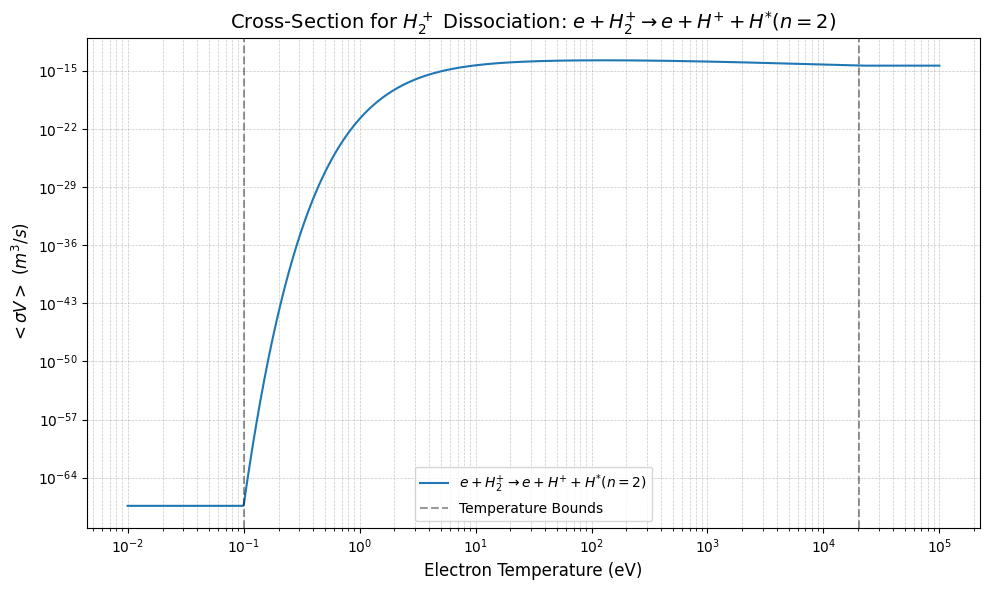

In [30]:
import numpy as np

def sigma_v_p_hn2_hp(Te):
    """
    Returns Maxwellian-averaged <sigma V> for electron impact dissociation of molecular hydrogen ions
    resulting in one proton and one H atom in the n=2 state. Coefficients are taken from Janev,
    "Elementary Processes in Hydrogen-Helium Plasmas", Springer-Verlag, 1987, p.260.

    Also returns minimum, maximum, and average energy of the resultant proton and H(n=2) atom.

    Parameters:
        Te (float or array-like): Electron temperature in eV. Must be within the range [0.1, 2e4] eV.

    Returns:
        dict: A dictionary containing:
            - 'sigma_v': Maxwellian-averaged <sigma V> in m^3/s.
            - 'E0_ave': Average energy of P and H(n=2) atom (eV).
            - 'E0_min': Minimum energy of P and H(n=2) atom (eV).
            - 'E0_max': Maximum energy of P and H(n=2) atom (eV).
    """
    # Ensure Te is a NumPy array and clip to valid temperature range
    Te = np.asarray(Te, dtype=np.float64)
    Te = np.clip(Te, 0.1, 2.01e4)

    # Coefficients for the polynomial expansion
    b = np.array([
        -3.408905929046e+1,
         1.573560727511e+1,
        -6.992177456733e+0,
         1.852216261706e+0,
        -3.130312806531e-1,
         3.383704123189e-2,
        -2.265770525273e-3,
         8.565603779673e-5,
        -1.398131377085e-6
    ])

    # Compute the Maxwellian-averaged <sigma V> using the polynomial expansion
    sigma_v = np.exp(np.polyval(b[::-1], np.log(Te))) * 1e-6

    # Energy values for the resultant particles (constant as per the IDL code)
    E0_ave = 1.5  # Average energy (eV)
    E0_min = 1.5  # Minimum energy (eV)
    E0_max = 1.5  # Maximum energy (eV)

    # Return results as a dictionary
    return {
        'sigma_v': sigma_v,
        'E0_ave': E0_ave,
        'E0_min': E0_min,
        'E0_max': E0_max
    }

# Example usage
if __name__ == '__main__':
    # Test with a scalar value
    Te_scalar = 100  # Example electron temperature in eV
    result_scalar = sigma_v_p_hn2_hp(Te_scalar)
    print(f"Results for Te={Te_scalar} eV:")
    print(f"  <sigma V>: {result_scalar['sigma_v']} m^3/s")
    print(f"  E0_ave: {result_scalar['E0_ave']} eV")
    print(f"  E0_min: {result_scalar['E0_min']} eV")
    print(f"  E0_max: {result_scalar['E0_max']} eV")

    # Test with an array of temperatures
    Te_array = np.logspace(-2, 5, 1000)
    result_array = sigma_v_p_hn2_hp(Te_array)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(Te_array, result_array['sigma_v'], label=r'$e+H_2^{+}\rightarrow e+H^{+}+H^{*}(n=2)$')
    plt.axvline(0.1, color='k', linestyle='--', alpha=0.4, label='Temperature Bounds')
    plt.axvline(2.01e4, color='k', linestyle='--', alpha=0.4)
    plt.title(r'Cross-Section for $H_2^+$ Dissociation: $e+H_2^{+}\rightarrow e+H^{+}+H^{*}(n=2)$', fontsize=14)
    plt.xlabel('Electron Temperature (eV)', fontsize=12)
    plt.ylabel(r'$<\sigma V>$ ($m^3/s$)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

# sigma_v_p_h1s_hp
$e+H_2^{+}\rightarrow e+H^{+}+H(1s)$

Results for Te=100 eV:
  <sigma V>: 1.0699080921218467e-13 m^3/s
  E0_ave: 4.3 eV
  E0_min: 4.3 eV
  E0_max: 4.3 eV


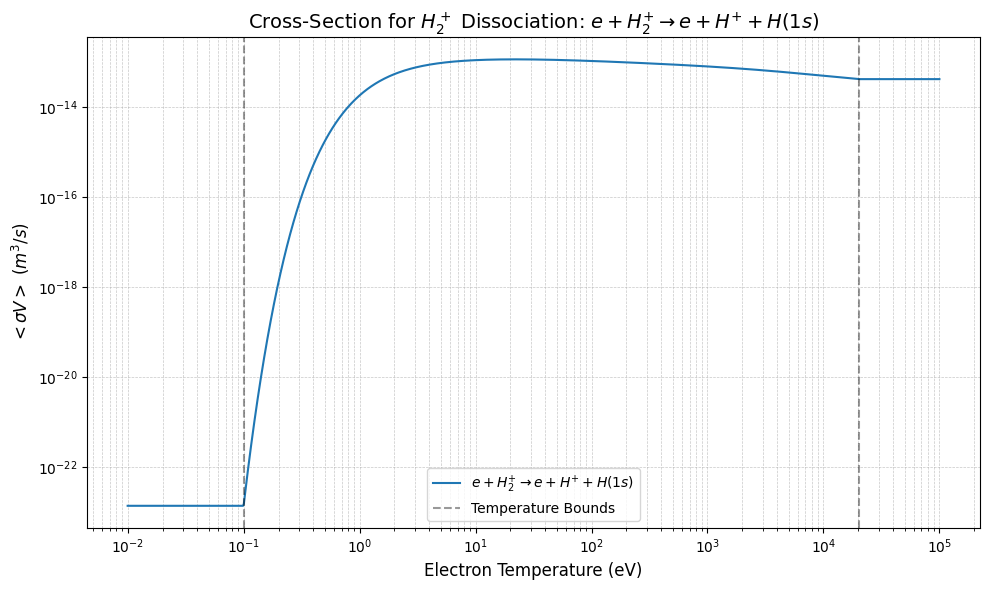

In [39]:
import numpy as np

def sigma_v_p_h1s_hp(Te):
    """
    Returns Maxwellian-averaged <sigma V> for electron impact dissociation of molecular hydrogen ions
    resulting in one proton and one H atom in the 1s state. Coefficients are taken from Janev,
    "Elementary Processes in Hydrogen-Helium Plasmas", Springer-Verlag, 1987, p.260.

    Also returns minimum, maximum, and average energy of the resultant proton and H(1s) atom.

    Parameters:
        Te (float or array-like): Electron temperature in eV. Must be within the range [0.1, 2e4] eV.

    Returns:
        dict: A dictionary containing:
            - 'sigma_v': Maxwellian-averaged <sigma V> in m^3/s.
            - 'E0_ave': Average energy of P and H(1s) atom (eV).
            - 'E0_min': Minimum energy of P and H(1s) atom (eV).
            - 'E0_max': Maximum energy of P and H(1s) atom (eV).
    """
    # Ensure Te is a NumPy array and clip to valid temperature range
    Te = np.asarray(Te, dtype=np.float64)
    Te = np.clip(Te, 0.1, 2.01e4)

    # Coefficients for the polynomial expansion
    b = np.array([
        -1.781416067709e+1,         2.277799785711e+0,        -1.266868411626e+0,
         4.296170447419e-1,        -9.609908013189e-2,         1.387958040699e-2,
        -1.231349039470e-3,         6.042383126281e-5,        -1.247521040900e-6
    ])

    # Compute the Maxwellian-averaged <sigma V> using the polynomial expansion
    sigma_v = np.exp(np.polyval(b[::-1], np.log(Te))) * 1e-6

    # Energy values for the resultant particles (constant as per the IDL code)
    E0_ave = 4.3  # Average energy (eV)
    E0_min = 4.3  # Minimum energy (eV)
    E0_max = 4.3  # Maximum energy (eV)

    # Return results as a dictionary
    return {
        'sigma_v': sigma_v,
        'E0_ave': E0_ave,
        'E0_min': E0_min,
        'E0_max': E0_max
    }

# Example usage
if __name__ == '__main__':
    # Test with a scalar value
    Te_scalar = 100  # Example electron temperature in eV
    result_scalar = sigma_v_p_h1s_hp(Te_scalar)
    print(f"Results for Te={Te_scalar} eV:")
    print(f"  <sigma V>: {result_scalar['sigma_v']} m^3/s")
    print(f"  E0_ave: {result_scalar['E0_ave']} eV")
    print(f"  E0_min: {result_scalar['E0_min']} eV")
    print(f"  E0_max: {result_scalar['E0_max']} eV")

    # Test with an array of temperatures
    Te_array = np.logspace(-2, 5, 1000)
    result_array = sigma_v_p_h1s_hp(Te_array)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(Te_array, result_array['sigma_v'], label=r'$e+H_2^{+}\rightarrow e+H^{+}+H(1s)$')
    plt.axvline(0.1, color='k', linestyle='--', alpha=0.4, label='Temperature Bounds')
    plt.axvline(2.01e4, color='k', linestyle='--', alpha=0.4)
    plt.title(r'Cross-Section for $H_2^+$ Dissociation: $e+H_2^{+}\rightarrow e+H^{+}+H(1s)$', fontsize=14)
    plt.xlabel('Electron Temperature (eV)', fontsize=12)
    plt.ylabel(r'$<\sigma V>$ ($m^3/s$)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()

# sigma_v_p_h1s_hh
$e+H_2\rightarrow e+H(1s)+e$

<sigma V> for Te=100 eV: 2.7035411612751683e-15 m^3/s


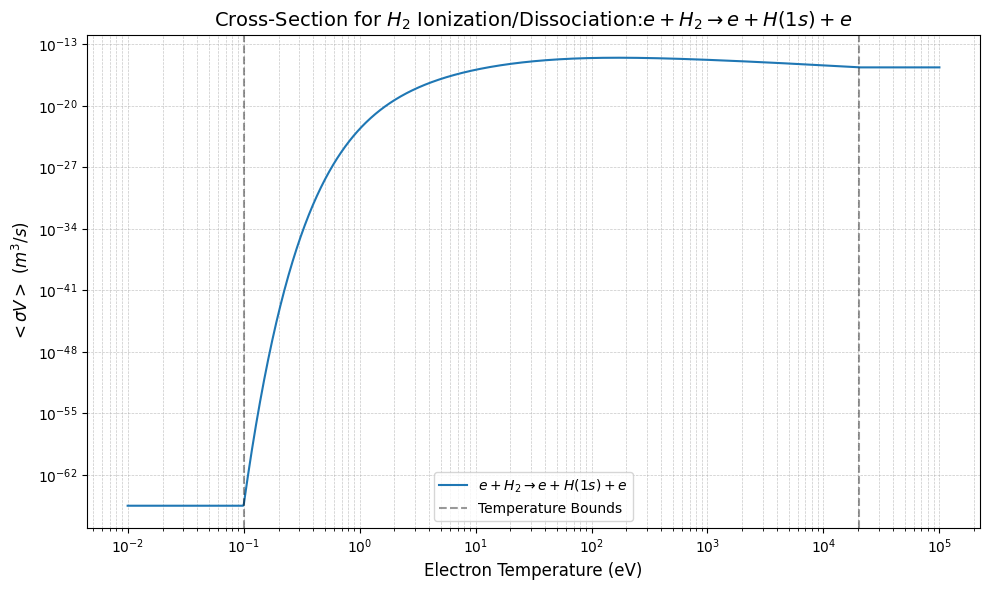

In [42]:
import numpy as np

def sigma_v_p_h1s_hh(Te):
    """
    Returns Maxwellian-averaged <sigma V> for electron impact ionization and dissociation of molecular hydrogen,
    resulting in one proton and one H atom in the 1s state. Coefficients are taken from Janev,
    "Elementary Processes in Hydrogen-Helium Plasmas", Springer-Verlag, 1987, p.260.

    Parameters:
        Te (float or array-like): Electron temperature in eV. Must be within the range [0.1, 2e4] eV.

    Returns:
        float or numpy.ndarray: Maxwellian-averaged <sigma V> in m^3/s.
                                For temperatures outside the valid range, the boundary values are returned.
    """
    # Ensure Te is a NumPy array and clip to valid temperature range
    Te = np.asarray(Te, dtype=np.float64)
    Te = np.clip(Te, 0.1, 2.01e4)

    # Coefficients for the polynomial expansion
    b = np.array([
        -3.834597006782e+1,         1.426322356722e+1,        -5.826468569506e+0,
         1.727940947913e+0,        -3.598120866343e-1,         4.822199350494e-2,
        -3.909402993006e-3,         1.738776657690e-4,        -3.252844486351e-6
    ])

    # Compute the Maxwellian-averaged <sigma V> using the polynomial expansion
    sigma_v = np.exp(np.polyval(b[::-1], np.log(Te))) * 1e-6

    return sigma_v

# Example usage
if __name__ == '__main__':
    # Test with a scalar value
    Te_scalar = 100  # Example electron temperature in eV
    print(f"<sigma V> for Te={Te_scalar} eV: {sigma_v_p_h1s_hh(Te_scalar)} m^3/s")

    # Test with an array of temperatures
    Te_array = np.logspace(-2, 5, 1000)  # Temperatures from 0.1 eV to 1e4 eV
    result = sigma_v_p_h1s_hh(Te_array)

    # Plot the results
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    plt.plot(Te_array, result, label=r'$e+H_2\rightarrow e+H(1s)+e$')
    plt.axvline(0.1, color='k', linestyle='--', alpha=0.4, label='Temperature Bounds')
    plt.axvline(2.01e4, color='k', linestyle='--', alpha=0.4)
    plt.title(r'Cross-Section for $H_2$ Ionization/Dissociation:$e+H_2\rightarrow e+H(1s)+e$', fontsize=14)
    plt.xlabel('Electron Temperature (eV)', fontsize=12)
    plt.ylabel(r'$<\sigma V>$ ($m^3/s$)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()